In [ ]:
# LATEX compatible 

# !mkdir tmp
# %cd tmp
# ! sudo apt-get install texlive-latex-recommended 
# ! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
# ! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
# ! unzip type1cm.zip -d /tmp/type1cm 
# ! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
# ! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
# ! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
# ! sudo texhash

# !apt install cm-super

In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2021, GESIS"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi",                
               "Claudia Wagner",
               "Markus Strohmaier"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"
%cd /mydrive

/content/drive/MyDrive/Colab Notebooks/Homophilic_Directed_ScaleFree_Networks


In [2]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)

In [3]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%pylab inline

import os
from org.gesis.lib import io
from org.gesis.lib import paper
from org.gesis.lib import viz

Populating the interactive namespace from numpy and matplotlib


In [4]:
ROOT = 'results/'
DATA = 'data/'

MODEL = 'DPAH'                                                     # main model
MODELS = ["Random","DPA","DH","DPAH"]                              # all models (Null)
ALLKIND = ['empirical'] + MODELS                                   # empirical and fit
MODELS_H = [m for m in MODELS if m not in ['Null','Random','DPA']] # models that rely on homophily
MARKERS = ["*","_","x","v","."] 
QTYPE = {'mae':'qae', 'me':'qe'}                                   # quadrant type (based on horizontal ineq. metric)
SMOOTH = 0.05                                                      # smooth for quadrant assignment
METRICS = ['pagerank', 'wtf']                                      # 'pagerank','wtf',indegree','outdegree',
DATASETS = ['aps','hate','blogs','wikipedia']

PLOTS = os.path.join(ROOT, 'plots')
viz.plot_setup(latex=True)                                         # Latex environment

<h2>Data</h2>

In [5]:
# empirical
df_node_metadata_empirical = paper.load_node_metadata(os.path.join(ROOT,'empirical'),DATASETS).query("dataset in @DATASETS")
df_network_metadata_empirical = paper.load_network_metadata(os.path.join(ROOT,'empirical'),DATASETS).query("dataset in @DATASETS")
df_rank_empirical = paper.load_rank(os.path.join(ROOT,'empirical'), df_network_metadata_empirical, SMOOTH, DATASETS, ALLKIND)

In [6]:
# fit
df_node_metadata_fit = paper.load_node_metadata(os.path.join(ROOT,'fit'),DATASETS)
df_rank_fit = paper.load_rank_all_models(os.path.join(ROOT,'fit'), MODELS, SMOOTH, DATASETS)
df_rank_fit = df_rank_fit.query("dataset in @DATASETS and kind in @ALLKIND")

In [7]:
# synthetic
df_rank_synthetic_all = paper.load_rank_synthetic_all_models(os.path.join(ROOT,'synthetic'), MODELS, SMOOTH, False)
df_rank_synthetic_all = df_rank_synthetic_all.query("kind in @MODELS")
df_rank_synthetic = paper.remove_extra_synthetic(df_rank_synthetic_all)

print(df_rank_synthetic_all.kind.unique(), df_rank_synthetic_all.shape)
print(df_rank_synthetic.kind.unique(), df_rank_synthetic.shape)

['Random' 'DPA' 'DH' 'DPAH'] (1630537, 22)
['Random' 'DPA' 'DH' 'DPAH'] (541501, 22)


In [8]:
df_rank = df_rank_empirical.copy()
df_rank = df_rank.append(df_rank_fit[df_rank.columns], ignore_index=True)
df_rank = df_rank.query("dataset in @DATASETS and kind in @ALLKIND")

<h2>Empirical networks</h2>
<p>Inequality and Inequity</p>

results/plots/sup_vh_ineq_empirical_me_all.pdf saved!


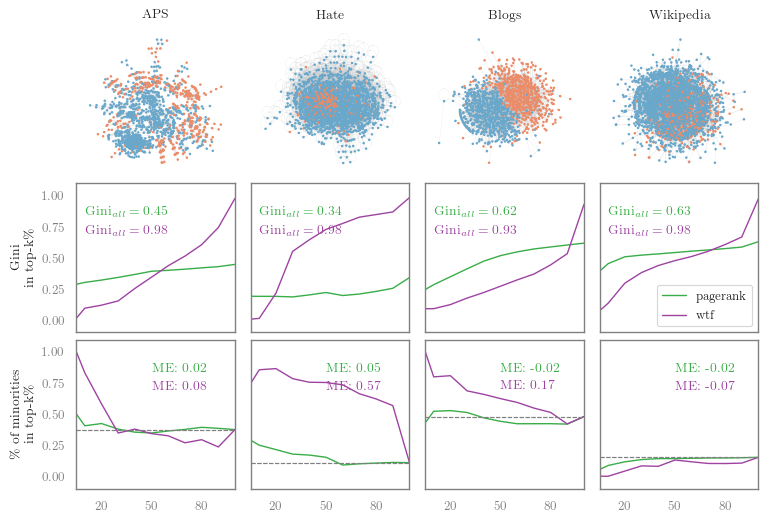

In [9]:
metric = 'all' # pagerank, all, wtf
vtype = 'me'
fn = os.path.join(PLOTS, "sup_vh_ineq_empirical_{}_{}.pdf".format(vtype,metric))
viz.plot_vh_inequalities_empirical(df_rank, graph_fnc=paper.load_graph_fnc, datapath=DATA, vtype=vtype, metric=metric, fn=fn)


<h2>Fit</h2>
<h3>Global Inequality and Inequity</h3>
<p>Inequality (i.e., gini of the whole ranking distribution).</p>
<p>Inequity (i.e., mean error of fraction of minorities across all top-k ranks.)</p>

In [10]:
vtype = 'me'
df_best_fit = paper.best_fit(df_rank_fit, df_rank_empirical, datasets=DATASETS, models=MODELS, vtype=vtype, metric=None)
df_best_fit.pivot(index='dataset', columns='metric', values='kind')

metric,indegree,outdegree,pagerank,wtf
dataset,,,,
aps,DPAH,DPA,DPA,DPAH
hate,DPAH,DPA,DPA,DPAH
blogs,DPAH,Random,DPAH,DPAH
wikipedia,DPAH,DH,DPAH,DPAH


results/plots/sup_vh_ineq_me_best_fit_mean.pdf saved!


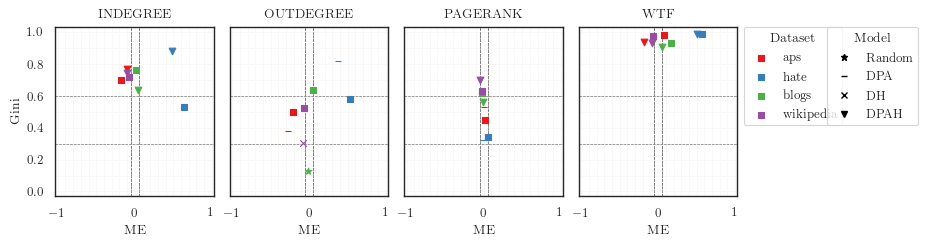

In [11]:
fn = os.path.join(PLOTS, "sup_vh_ineq_{}_best_fit_mean.pdf".format(vtype))
viz.plot_inequalities_fit_improved(df_best_fit, df_rank_empirical, 
                                   models=MODELS, markers=MARKERS, 
                                   valid_metrics=None, 
                                   vtype=vtype, fn=fn)

<h3>Degree distributions (empirical vs. fit)</h3>

results/plots/sup_vh_degree_distribution_empirical_fit.pdf saved!


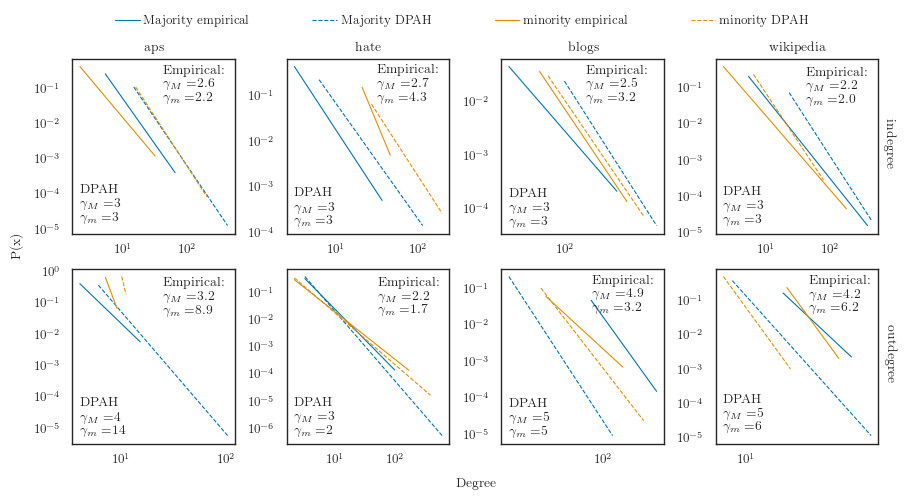

In [12]:
fn = os.path.join(PLOTS, "sup_vh_degree_distribution_empirical_fit.pdf")
viz.plot_degree_distributions_groups_fit(df_network_metadata_empirical,
                                         df_node_metadata_empirical, 
                                         df_node_metadata_fit, 
                                         model=MODEL,
                                         forcepl=False,
                                         fn=fn)

<h2>Synthetic networks</h2>
<h3>Local inequality and inequity (within top-k ranks)</h3>
<p>Inequality per top-k rank.</p>
<p>Inequity per top-k rank.</p>

In [13]:
sym = False
metric = 'pagerank'
model = MODEL

results/plots/sup_h_fmt_synthetic_DPAH_topk.pdf saved!


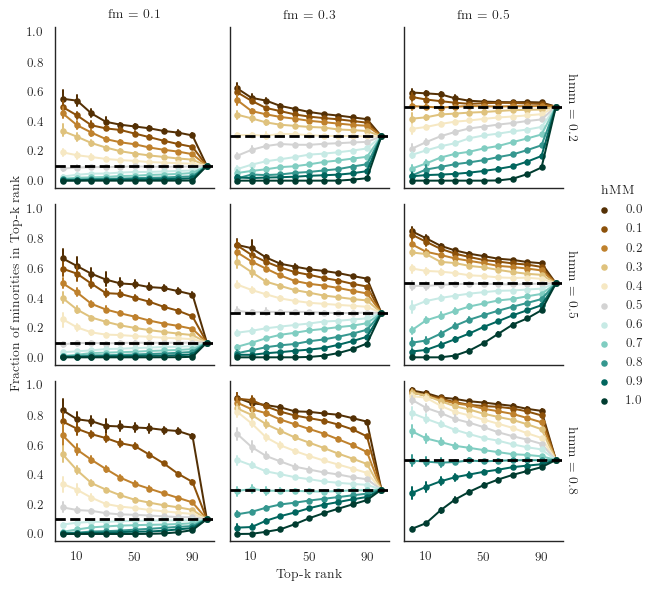

In [14]:
y = 'fmt'
fn = os.path.join(PLOTS, "sup_h_{}_synthetic_{}_topk.pdf".format(y,model))
viz.plot_synthetic_rankings(df_rank_synthetic.query("kind==@model"), metric=metric, y=y, sym=sym, fn=fn)

results/plots/sup_v_gt_synthetic_DPAH_topk.pdf saved!


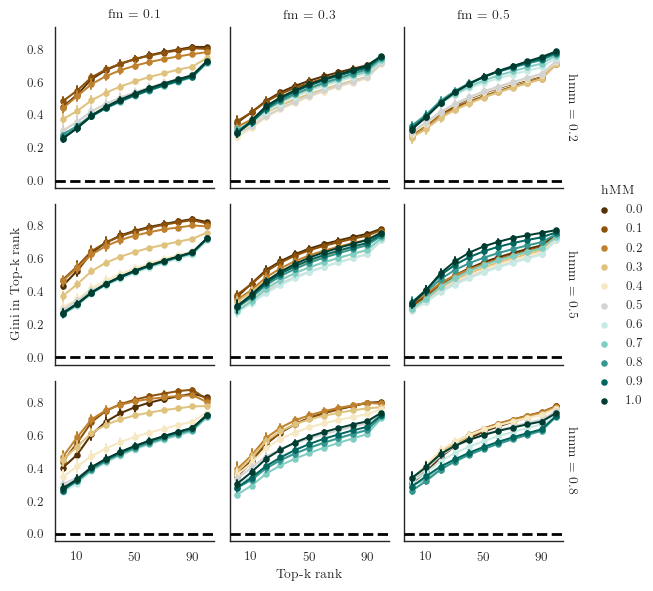

In [15]:
y = 'gt'
fn = os.path.join(PLOTS, "sup_v_{}_synthetic_{}_topk.pdf".format(y,model))
viz.plot_synthetic_rankings(df_rank_synthetic.query("kind==@model"), metric=metric, y=y, sym=sym, fn=fn)

## Feature importance

In [16]:
KFOLD = 10

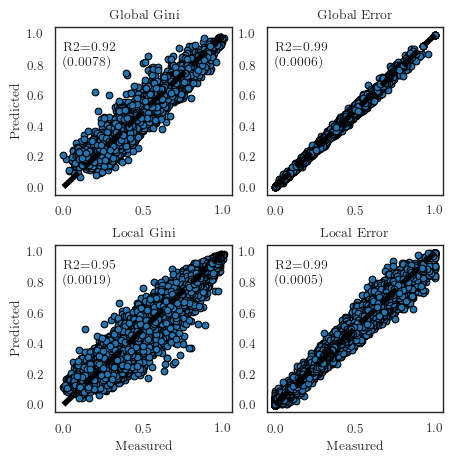

,kind,output,r2mean,r2std,feature,importance
0,global,gini,0.92,0.0078,"[hMM, hmm, fm, random]","[0.43, 0.32, 0.21, 0.05]"
1,global,error,0.99,0.0006,"[hMM, hmm, fm, random]","[0.61, 0.31, 0.08, 0.0]"
2,local,gini,0.95,0.0019,"[rank, hMM, hmm, fm, random]","[0.73, 0.11, 0.07, 0.06, 0.03]"
3,local,error,0.99,0.0005,"[hMM, hmm, rank, fm, random]","[0.51, 0.26, 0.14, 0.08, 0.01]"


In [17]:
metric = 'pagerank'
df_summary = viz.feature_importance(df_rank_synthetic, MODEL, metric, kfold=KFOLD)
df_summary

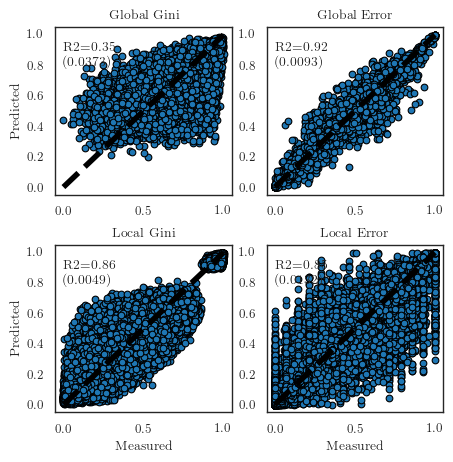

,kind,output,r2mean,r2std,feature,importance
0,global,gini,0.35,0.0373,"[random, hMM, hmm, fm]","[0.37, 0.27, 0.22, 0.14]"
1,global,error,0.92,0.0093,"[hMM, hmm, fm, random]","[0.51, 0.37, 0.07, 0.05]"
2,local,gini,0.86,0.0049,"[rank, random, hmm, hMM, fm]","[0.86, 0.08, 0.02, 0.02, 0.01]"
3,local,error,0.85,0.0132,"[hMM, hmm, rank, random, fm]","[0.43, 0.31, 0.11, 0.08, 0.07]"


In [18]:
metric = 'wtf'
df_summary = viz.feature_importance(df_rank_synthetic, MODEL, metric, kfold=KFOLD)
df_summary

## Density vs. Outdegree

results/plots/sup_v_ineq_Random.pdf saved!


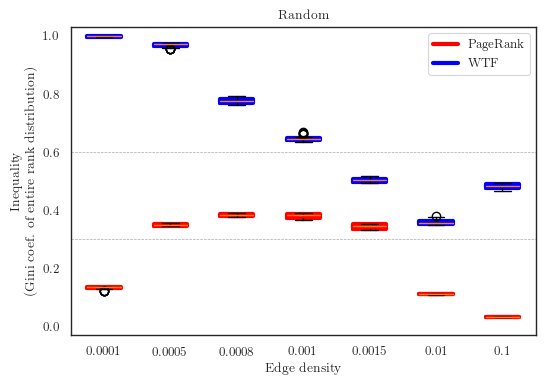

In [19]:
model = 'Random'
fn = os.path.join(PLOTS, "sup_v_ineq_{}.pdf".format(model))
tmp, _, _ = paper.only_new_cases(df_rank_synthetic_all, model)
viz.plot_gini_density_distribution(tmp, title=model, fn=fn)

results/plots/sup_vh_ineq_me_pagerank_mean.pdf saved!


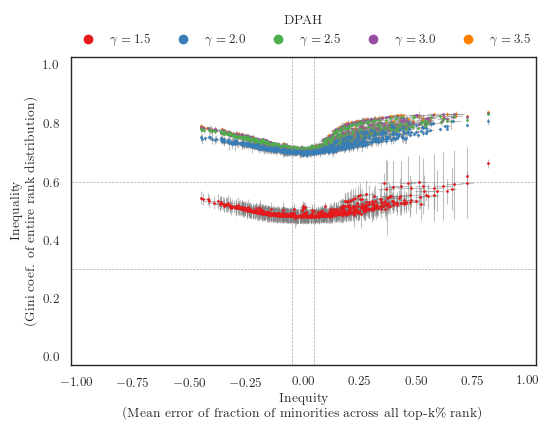

In [20]:
metric = 'pagerank'
vtype = 'me'
mean = True
model = MODEL

fn = os.path.join(PLOTS, "sup_vh_ineq_{}_{}_{}.pdf".format(vtype, metric, 'mean' if mean else 'all'))
tmp, models, markers = paper.only_new_cases(df_rank_synthetic_all, model)
viz.plot_inequalities(tmp, models, markers, vtype=vtype, mean=mean, metric=metric, title=model, fn=fn)

---